# Regression Training Pipeline

This file contains the pipeline to train and finetune multiple models with the given data.

Run, the data_preparation file before running this file.

This file trains the following models:
1. Random forest regressor
2. Linear Regressor
3. KNN Regressor
4. GradientBoostingRegressor
5. XGBRegressor

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Load data

Available data files:

1. ../data/processed/1_checkpoint_content_before_preprocessing.csv
2. ../data/processed/2_checkpoint_after_null.csv
3. ../data/processed/3_checkpoint_before_lemmentation.csv
4. ../data/processed/4_after_lemmentation.csv
5. ../data/processed/5_checkpoint_after_feature_engineering.csv
6. ../data/processed/6_checkpoint_final_data.csv

In [2]:
data = pd.read_csv("../data/processed/3_checkpoint_before_lemmentation.csv")

In [3]:
data.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,age_requirement,skills_required,matched_score,resume_id,resume_text,job_id,jobs_text,total_experience,min_experience_required,experience_match
0,NaN,big data analytics working database warehouse ...,"['big data', 'hadoop', 'hive', 'python', 'mapr...",['the amity school engineering & technology (a...,['b.tech'],['2019'],[''],[],['electronics'],['cocacola'],...,NaN,NaN,0.850000,1,big data analytics working database warehouse ...,1,senior software engineer b.sc computer science...,4,1,3
1,NaN,fresher looking join data analyst junior data ...,"['data analysis', 'data analytics', 'business ...","['delhi university hansraj college', 'delhi un...","['b.sc (maths)', 'm.sc (science) (statistics)']","['2015', '2018']","['', '']","['', '']","['mathematics', 'statistics']",['bib consultancy'],...,NaN,NaN,0.750000,2,fresher looking join data analyst junior data ...,2,machine learning (ml) engineer m.sc computer s...,5,5,0
2,NaN,NaN,"['software development', 'machine learning', '...","['birla institute technology (bit), ranchi']",['b.tech'],['2018'],[''],[''],['electronics/telecommunication'],['axis bank limited'],...,NaN,brand promotion campaign management field supe...,0.416667,3,"['software development', 'machine learning', '...",3,"executive/ senior executive trade marketing, h...",6,3,3
3,NaN,obtain position fastpaced business office envi...,"['accounts payables', 'accounts receivables', ...","['martinez adult education, business training ...",['computer applications specialist certificate...,['2008'],[],[],['computer applications'],"['company name ï¼ city , state', 'company name...",...,age 22 30 years,fast typing skill ieltsinternet browsing & onl...,0.760000,4,obtain position fastpaced business office envi...,4,business development executive bachelor/honors...,14,1,13
4,NaN,professional accountant outstanding work ethic...,"['analytical reasoning', 'compliance testing k...",['kent state university'],['bachelor business administration'],[],['3.84'],[],['accounting'],"['company name', 'company name', 'company name...",...,NaN,ios ios app developer ios application developm...,0.650000,5,professional accountant outstanding work ethic...,5,senior ios engineer bachelor science (bsc) com...,16,4,12


## Model Training

In [4]:
predictors_features = ['jobs_text', 'resume_text']
predictors = data.drop(columns=["matched_score"])
y = data['matched_score']

In [5]:
def load_default_model_data():
    tfidf = TfidfVectorizer(max_features=500, stop_words='english')
    # Predictors in data
    preprocessor = ColumnTransformer(
        transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
    )
    X = preprocessor.fit_transform(predictors)
    y = data['matched_score'].values
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

## Linear Regressor

In [6]:
# Base Model
model = LinearRegression()
X_train, X_test, y_train, y_test = load_default_model_data()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2

(0.12076277605658907, 0.09324879082238799, 0.4726272242661913)

### Finetune Linear Regressor

In [7]:
# Tune linear regression model along with TFIDF vectorization
n_gram_ranges = [(1, 1), (1, 2), (2, 2), (1, 3)]
max_features = [500, 1000, None]
results = []
for ngram_range in n_gram_ranges:
    for max_feat in max_features:
        tfidf = TfidfVectorizer(max_features=max_feat, ngram_range=ngram_range, stop_words='english')
        preprocessor = ColumnTransformer(
            transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
        )
        X_transformed = preprocessor.fit_transform(predictors)
        
        X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Train data evaluation
        y_pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        
        
        results.append({
            'ngram_range': ngram_range,
            'max_features': max_feat,
            'rmse': rmse,
            'mae': mae,
            'r2': r2,
            'rmse_train': rmse_train,
            'mae_train': mae_train,
            'r2_train': r2_train
        })

In [8]:
linear_df = pd.DataFrame(results).sort_values(by='rmse')
linear_df

,ngram_range,max_features,rmse,mae,r2,rmse_train,mae_train,r2_train
0,"(1, 1)",500.0,0.120763,0.093249,0.472627,0.117847,0.090798,0.503276
3,"(1, 2)",500.0,0.120763,0.093249,0.472627,0.117847,0.090798,0.503276
2,"(1, 1)",NaN,0.120763,0.093249,0.472627,0.117847,0.090798,0.503276
11,"(1, 3)",NaN,0.120763,0.093249,0.472627,0.117847,0.090798,0.503276
7,"(2, 2)",1000.0,0.120763,0.093249,0.472626,0.117847,0.090798,0.503276
1,"(1, 1)",1000.0,0.120763,0.093249,0.472626,0.117847,0.090798,0.503276
8,"(2, 2)",NaN,0.120763,0.093249,0.472626,0.117847,0.090798,0.503276
5,"(1, 2)",NaN,0.120763,0.093249,0.472626,0.117847,0.090798,0.503276
10,"(1, 3)",1000.0,0.120763,0.093249,0.472626,0.117847,0.090798,0.503276
4,"(1, 2)",1000.0,0.120763,0.093249,0.472625,0.117847,0.090798,0.503276


In [9]:
def plot_results(df, param_columns):
    # Create a unique label for each parameter combination
    df['params'] = df[param_columns].apply(lambda row: ' | '.join([f"{col}={row[col]}" for col in param_columns]), axis=1)

    # Plotting the performance metrics
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

    # RMSE Plot
    axes[0].plot(df['params'], df['rmse'], marker='o', label='Test RMSE')
    axes[0].plot(df['params'], df['rmse_train'], marker='x', label='Train RMSE')
    axes[0].set_ylabel("RMSE")
    axes[0].set_title("RMSE for Different Parameters")
    axes[0].legend()
    axes[0].grid(True)

    # MAE Plot
    axes[1].plot(df['params'], df['mae'], marker='o', label='Test MAE')
    axes[1].plot(df['params'], df['mae_train'], marker='x', label='Train MAE')
    axes[1].set_ylabel("MAE")
    axes[1].set_title("MAE for Different Parameters")
    axes[1].legend()
    axes[1].grid(True)

    # R² Plot
    axes[2].plot(df['params'], df['r2'], marker='o', label='Test R²')
    axes[2].plot(df['params'], df['r2_train'], marker='x', label='Train R²')
    axes[2].set_ylabel("R² Score")
    axes[2].set_title("R² Score for Different Parameters")
    axes[2].legend()
    axes[2].set_xticks(range(len(df['params'])))
    axes[2].set_xticklabels(df['params'], rotation=45, ha='right')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()


In [10]:
linear_df.columns

Index(['ngram_range', 'max_features', 'rmse', 'mae', 'r2', 'rmse_train',
       'mae_train', 'r2_train'],
      dtype='object')

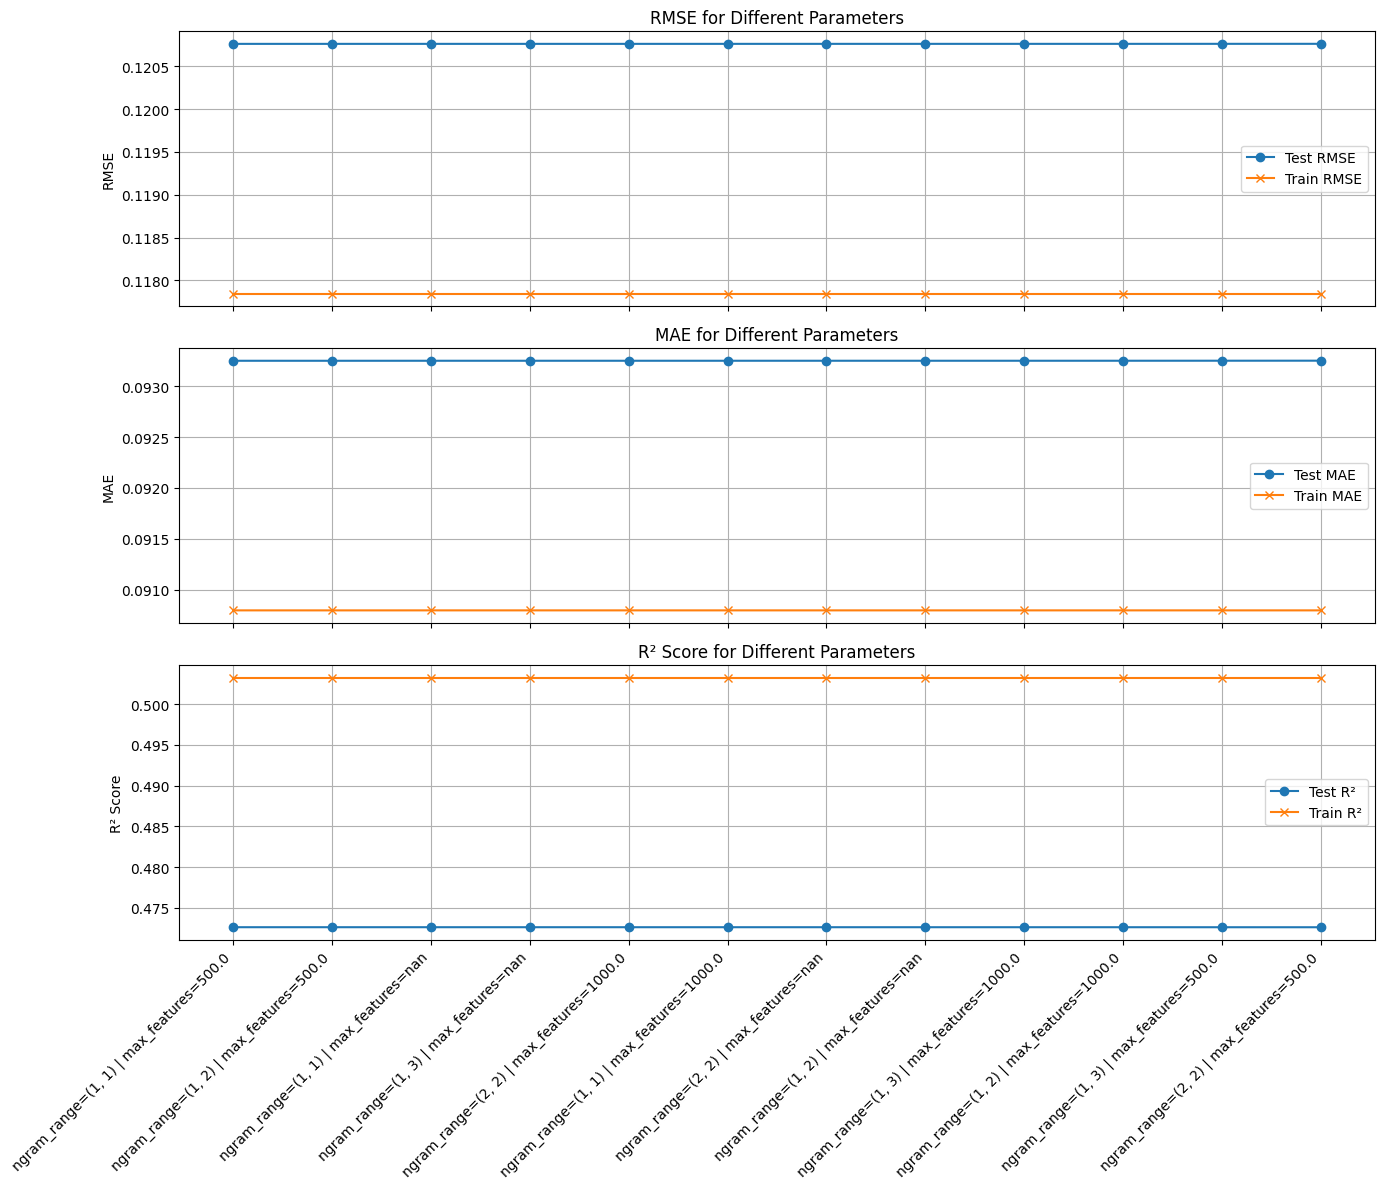

In [11]:
plot_results(linear_df, ['ngram_range', 'max_features'])

From the plot, we can see the model is overfitting for few parameters.

The model is giving best performance with less signs of overfitting for:
ngram_range = (1,1)
max_features = 1000

In [13]:
linear_df.to_csv("../results/linear_reg_results.csv", index=False)

## Ridge Regression

In [14]:
# Base Model with Ridge Regression
ridge_model = Ridge(alpha=1.0)
X_train, X_test, y_train, y_test = load_default_model_data()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge, mae_ridge, r2_ridge

(0.12085994526849414, 0.09370660675036513, 0.47177820414538896)

### Finetune Ridge Regressor

In [15]:
# Tune ridge regression model along with TFIDF vectorization and other model parameters
ridge_results = []
alphas = [0.1, 1, 10, 100]
n_gram_ranges = [(1, 1), (1, 2), (2, 2), (1, 3)]
max_features = [500, 1000, None]
for alpha in alphas:
    for ngram_range in n_gram_ranges:
        for max_feat in max_features:
            tfidf = TfidfVectorizer(max_features=max_feat, ngram_range=ngram_range, stop_words='english')
            preprocessor = ColumnTransformer(
                transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
            )
            X_transformed = preprocessor.fit_transform(predictors)
            
            X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
            
            model = Ridge(alpha=alpha)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Train data evaluation
            y_pred_train = model.predict(X_train)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            mae_train = mean_absolute_error(y_train, y_pred_train)
            r2_train = r2_score(y_train, y_pred_train)
            
            ridge_results.append({
                'alpha': alpha,
                'ngram_range': ngram_range,
                'max_features': max_feat,
                'rmse': rmse,
                'mae': mae,
                'r2': r2,
                'rmse_train': rmse_train,
                'mae_train': mae_train,
                'r2_train': r2_train
            })

In [16]:
ridge_df = pd.DataFrame(ridge_results).sort_values(by='rmse')
ridge_df

,alpha,ngram_range,max_features,rmse,mae,r2,rmse_train,mae_train,r2_train
14,1.0,"(1, 1)",NaN,0.120568,0.093158,0.474331,0.117925,0.090819,0.502616
17,1.0,"(1, 2)",NaN,0.120580,0.093129,0.474220,0.117895,0.090790,0.502871
23,1.0,"(1, 3)",NaN,0.120583,0.093123,0.474198,0.117891,0.090786,0.502903
20,1.0,"(2, 2)",NaN,0.120587,0.093119,0.474158,0.117892,0.090782,0.502897
16,1.0,"(1, 2)",1000.0,0.120594,0.093222,0.474100,0.118125,0.090993,0.500935
0,0.1,"(1, 1)",500.0,0.120607,0.093218,0.473985,0.117900,0.090876,0.502831
3,0.1,"(1, 2)",500.0,0.120611,0.093171,0.473950,0.117928,0.090895,0.502594
9,0.1,"(1, 3)",500.0,0.120616,0.093142,0.473912,0.117955,0.090934,0.502363
22,1.0,"(1, 3)",1000.0,0.120616,0.093241,0.473907,0.118158,0.091012,0.500655
13,1.0,"(1, 1)",1000.0,0.120654,0.093376,0.473581,0.118103,0.091004,0.501122


In [17]:
ridge_df.columns

Index(['alpha', 'ngram_range', 'max_features', 'rmse', 'mae', 'r2',
       'rmse_train', 'mae_train', 'r2_train'],
      dtype='object')

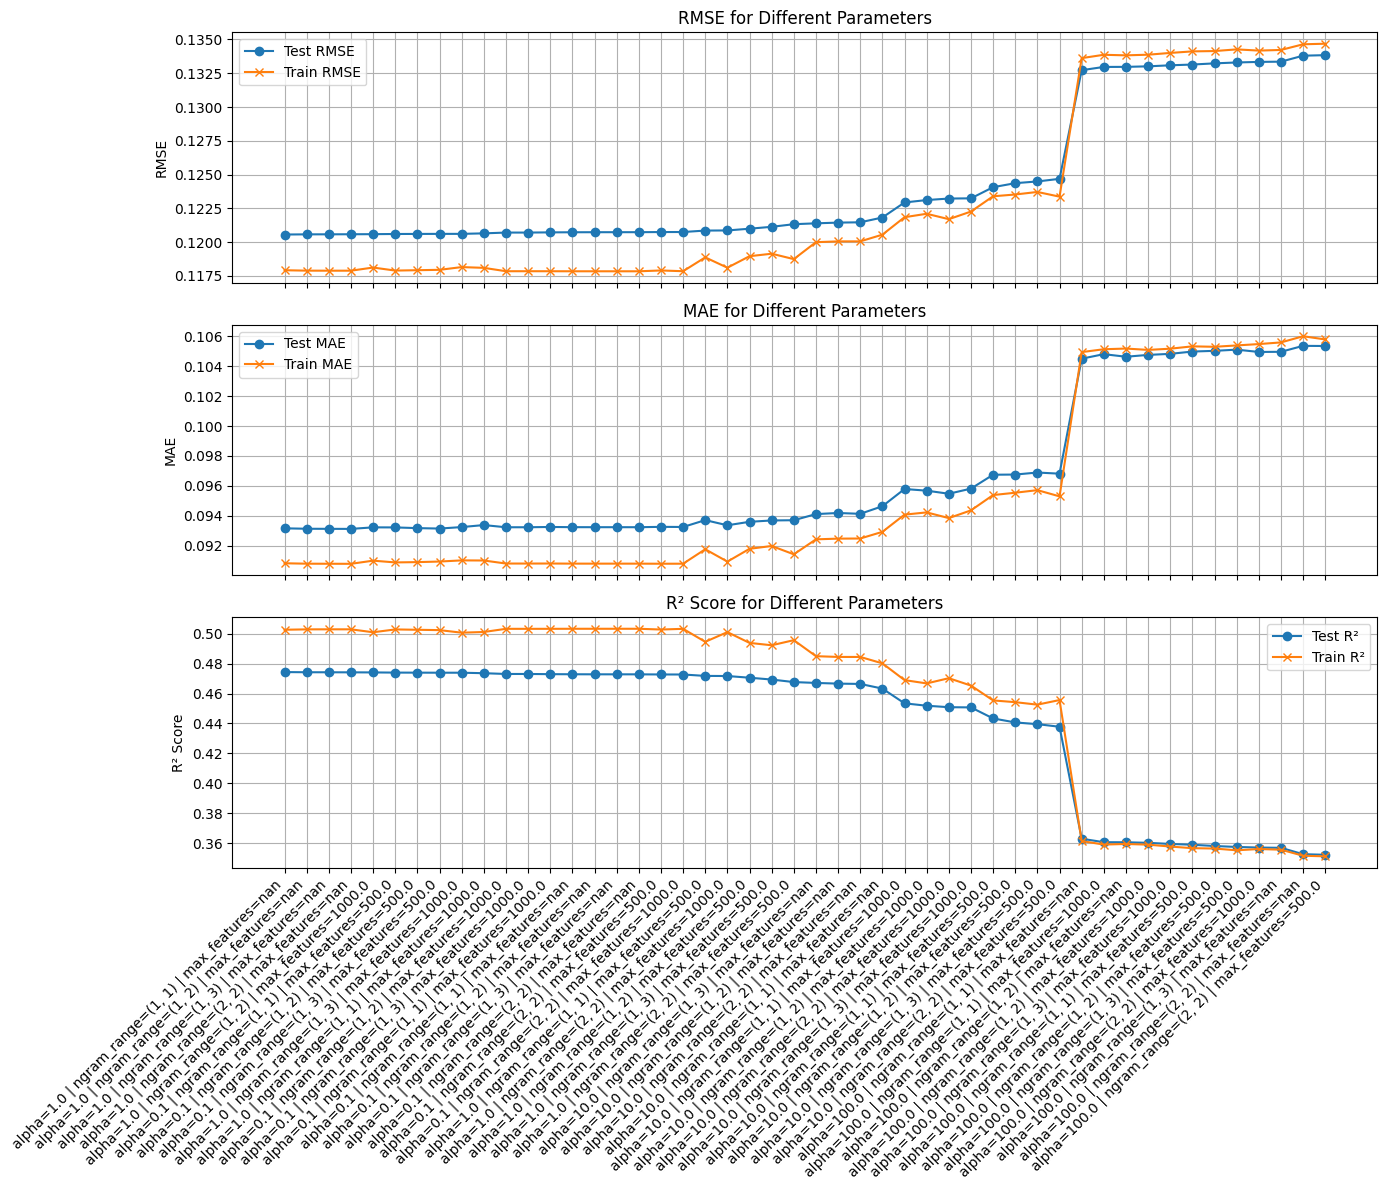

In [18]:
plot_results(ridge_df, ['alpha', 'ngram_range', 'max_features'])

Ridge regression model as expected showed less signs of overfitting for a range of parameters.

Considering the tradeoff between performance and complexity, 

The model is giving best results for params:

ngram_range = (1,1)

max_features = 1000

alpha = 0.1

In [19]:
ridge_df.to_csv("../results/ridge_results.csv", index=False)

## Random Forest Regressor

In [20]:
# Base model with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = load_default_model_data()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf, mae_rf, r2_rf

(0.0980196942421354, 0.07245531612783415, 0.6525612788247542)

In [21]:
# Tune Random forest regression model along with TFIDF vectorization and other model parameters
rf_results = []
n_estimators = [50, 100]
max_depths = [None, 10, 20]
n_gram_ranges = [(1, 1), (1, 2)]
max_features = [500, 1000, None]
for n_estimators in n_estimators:
    for max_depth in max_depths:
        for ngram_range in n_gram_ranges:
            for max_feat in max_features:
                tfidf = TfidfVectorizer(max_features=max_feat, ngram_range=ngram_range, stop_words='english')
                preprocessor = ColumnTransformer(
                    transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
                )
                X_transformed = preprocessor.fit_transform(predictors)
                X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
                model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                # Train data evaluation
                y_pred_train = model.predict(X_train)
                rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                mae_train = mean_absolute_error(y_train, y_pred_train)
                r2_train = r2_score(y_train, y_pred_train)
                rf_results.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'ngram_range': ngram_range,
                    'max_features': max_feat,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'rmse_train': rmse_train,
                    'mae_train': mae_train,
                    'r2_train': r2_train
                })

KeyboardInterrupt: 

In [ ]:
rf_results = pd.DataFrame(rf_results).sort_values(by='rmse')
rf_results

In [ ]:
rf_results.to_csv("../results/random_forest_results.csv", index=False)

In [ ]:
rf_results = pd.read_csv("../results/random_forest_results.csv")
rf_results

In [ ]:
rf_results.columns

In [ ]:
plot_results(rf_results, ['n_estimators', 'max_depth', 'ngram_range', 'max_features'])

The model is overfitting for most of the parameters.
The results as well are bad compared to ridge regression model we have seen earlier. So, we are ignoring the model.

## KNN Regressor

In [22]:
# Base model with KNN regressor
knn_model = KNeighborsRegressor()
X_train, X_test, y_train, y_test = load_default_model_data()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn, mae_knn, r2_knn

(0.1179365032649816, 0.08902522659601884, 0.49702311706560753)

In [32]:
# Finetune KNN regressor model along with TFIDF vectorization and other model parameters
knn_results = []
n_neighbors = [3, 5, 10]
weights = ['uniform', 'distance']
n_gram_ranges = [(1, 1), (1, 2)]
max_features = [500, 1000, None]
for n_neighbors in n_neighbors:
    for weight in weights:
        for ngram_range in n_gram_ranges:
            for max_feat in max_features:
                tfidf = TfidfVectorizer(max_features=max_feat, ngram_range=ngram_range, stop_words='english')
                preprocessor = ColumnTransformer(
                    transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
                ) 
                X_transformed = preprocessor.fit_transform(predictors)
                X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
                model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                # Train data evaluation
                y_pred_train = model.predict(X_train)
                rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                mae_train = mean_absolute_error(y_train, y_pred_train)
                r2_train = r2_score(y_train, y_pred_train)
                knn_results.append({
                    'n_neighbors': n_neighbors,
                    'weights': weight,
                    'ngram_range': ngram_range,
                    'max_features': max_feat,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'rmse_train': rmse_train,
                    'mae_train': mae_train,
                    'r2_train': r2_train
                })
pd.DataFrame(knn_results).sort_values(by='rmse')

,n_neighbors,weights,ngram_range,max_features,rmse,mae,r2,rmse_train,mae_train,r2_train
32,10,distance,"(1, 1)",NaN,0.109744,0.083426,0.564478,0.000000,0.000000,1.000000
26,10,uniform,"(1, 1)",NaN,0.109997,0.083528,0.562462,0.099791,0.075910,0.643826
35,10,distance,"(1, 2)",NaN,0.110415,0.084141,0.559137,0.000000,0.000000,1.000000
29,10,uniform,"(1, 2)",NaN,0.110569,0.084198,0.557905,0.099798,0.076213,0.643776
31,10,distance,"(1, 1)",1000.0,0.111968,0.084998,0.546644,0.000000,0.000000,1.000000
25,10,uniform,"(1, 1)",1000.0,0.112098,0.085078,0.545589,0.101473,0.076672,0.631719
30,10,distance,"(1, 1)",500.0,0.112243,0.084702,0.544411,0.000000,0.000000,1.000000
24,10,uniform,"(1, 1)",500.0,0.112331,0.084749,0.543700,0.102218,0.077134,0.626291
34,10,distance,"(1, 2)",1000.0,0.112975,0.085259,0.538449,0.000000,0.000000,1.000000
28,10,uniform,"(1, 2)",1000.0,0.113009,0.085285,0.538175,0.103001,0.077368,0.620549


In [33]:
knn_df = pd.DataFrame(knn_results).sort_values(by='rmse')
knn_df.to_csv("../results/knn_results.csv", index=False)

In [34]:
knn_df.columns

Index(['n_neighbors', 'weights', 'ngram_range', 'max_features', 'rmse', 'mae',
       'r2', 'rmse_train', 'mae_train', 'r2_train'],
      dtype='object')

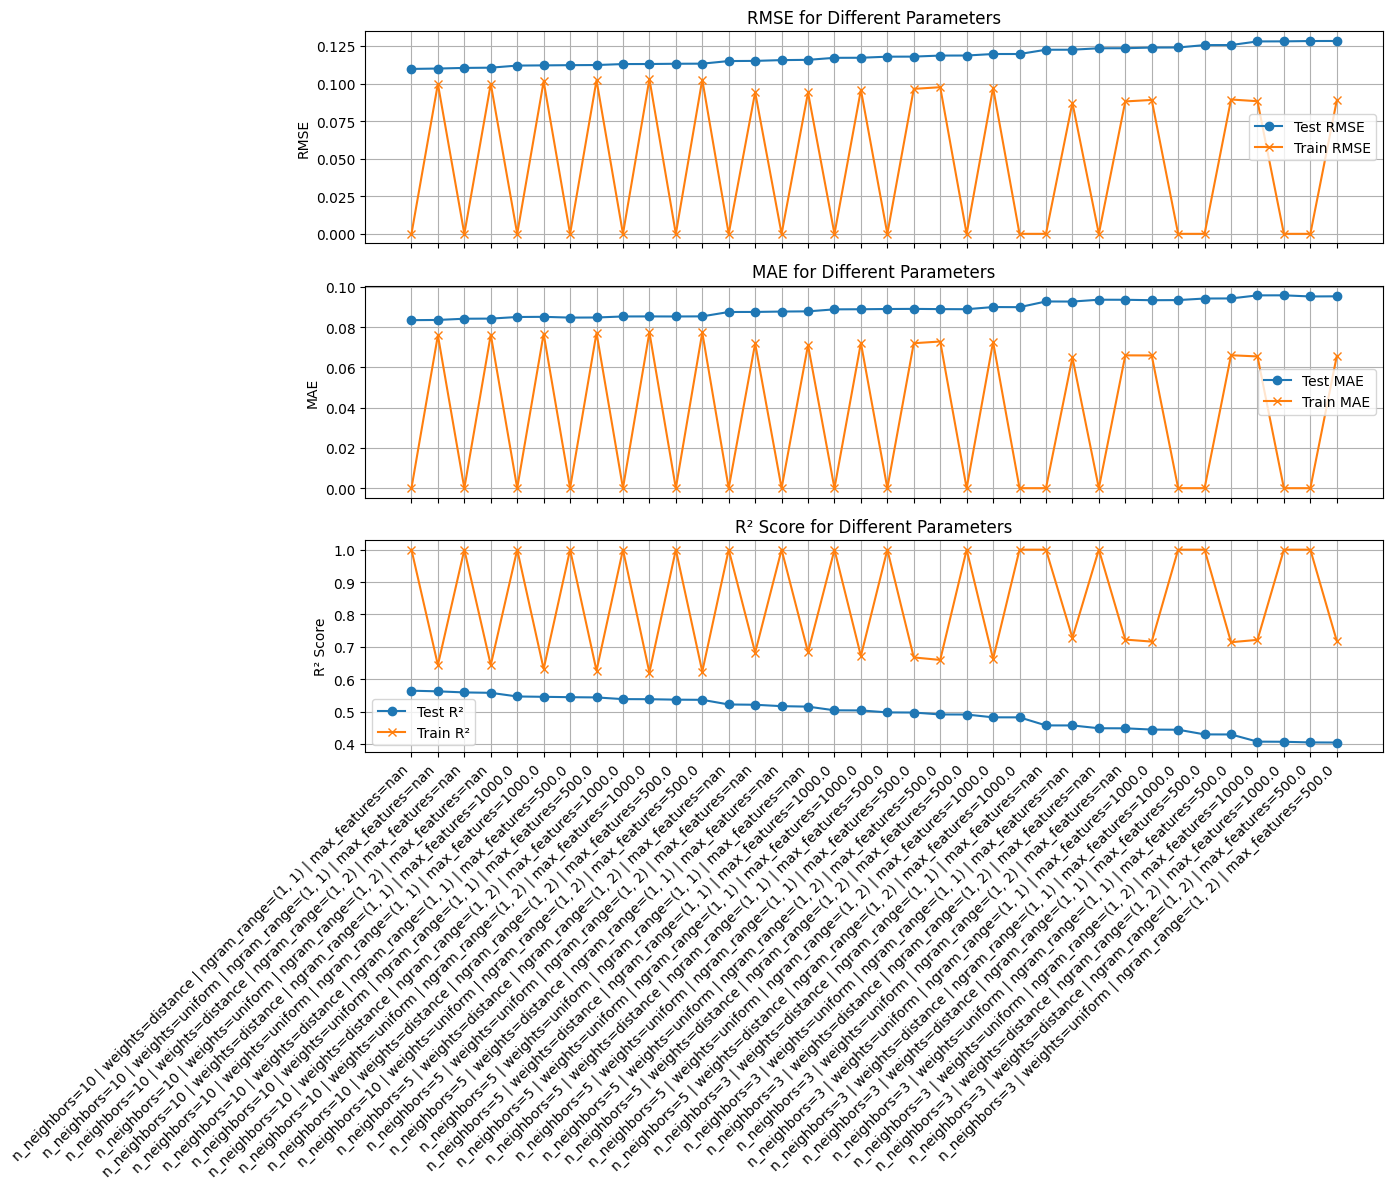

In [35]:
plot_results(knn_df, ['n_neighbors', 'weights', 'ngram_range', 'max_features'])

KNN model is also overfitting for most of the parameters. For one set of parameter, it is not overfitting. But, the performance of the model is bad. So, we are ignoring the kNN model.

## XG Boost Regressor

In [24]:
# Train with base XG Boost Regressor
xgb_model = XGBRegressor()
X_train, X_test, y_train, y_test = load_default_model_data()
xgb_model.fit(X_train, y_train)
y_pred_xg = xgb_model.predict(X_test)
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)
rmse_xg, mae_xg, r2_xg

(0.09418049510986931, 0.0704141651297226, 0.6792449746197133)

In [26]:
# Tune XG Boost regressor model along with TFIDF vectorization and other model parameters
xgb_results = []
n_estimators = [50, 100]
max_depths = [3, 6, 10]
learning_rates = [0.01, 0.1, None]
n_gram_ranges = [(1, 1), (1, 2)]
max_features = [1000, None]
for n_estimators in n_estimators:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            for ngram_range in n_gram_ranges:
                for max_feat in max_features:
                    tfidf = TfidfVectorizer(max_features=max_feat, ngram_range=ngram_range, stop_words='english')
                    preprocessor = ColumnTransformer(
                        transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
                    )
                    X_transformed = preprocessor.fit_transform(predictors)
                    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
                    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    mae = mean_absolute_error(y_test, y_pred)
                    r2 = r2_score(y_test, y_pred)
                    # Train data evaluation
                    y_pred_train = model.predict(X_train)
                    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                    mae_train = mean_absolute_error(y_train, y_pred_train)
                    r2_train = r2_score(y_train, y_pred_train)
                    
                    xgb_results.append({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'ngram_range': ngram_range,
                        'max_features': max_feat,
                        'rmse': rmse,
                        'mae': mae,
                        'r2': r2,
                        'rmse_train': rmse_train,
                        'mae_train': mae_train,
                        'r2_train': r2_train
                    })

In [27]:
xgb_results = pd.DataFrame(xgb_results).sort_values(by="rmse")
xgb_results

,n_estimators,max_depth,learning_rate,ngram_range,max_features,rmse,mae,r2,rmse_train,mae_train,r2_train
67,100,10,0.10,"(1, 2)",NaN,0.092276,0.068558,0.692085,0.038148,0.028032,0.947951
65,100,10,0.10,"(1, 1)",NaN,0.094152,0.069115,0.679441,0.037355,0.027593,0.950091
31,50,10,0.10,"(1, 2)",NaN,0.094387,0.070599,0.677837,0.051458,0.038551,0.905293
57,100,6,NaN,"(1, 1)",NaN,0.094519,0.070813,0.676934,0.049061,0.037285,0.913910
64,100,10,0.10,"(1, 1)",1000.0,0.094782,0.069753,0.675133,0.037068,0.027542,0.950855
...,...,...,...,...,...,...,...,...,...,...,...
14,50,6,0.01,"(1, 2)",1000.0,0.138729,0.110134,0.304033,0.137741,0.109660,0.321415
0,50,3,0.01,"(1, 1)",1000.0,0.146142,0.116159,0.227671,0.147996,0.118099,0.216618
1,50,3,0.01,"(1, 1)",NaN,0.146171,0.116131,0.227371,0.148022,0.118130,0.216340
2,50,3,0.01,"(1, 2)",1000.0,0.146431,0.116433,0.224609,0.148289,0.118260,0.213508


In [28]:
xgb_results.columns

Index(['n_estimators', 'max_depth', 'learning_rate', 'ngram_range',
       'max_features', 'rmse', 'mae', 'r2', 'rmse_train', 'mae_train',
       'r2_train'],
      dtype='object')

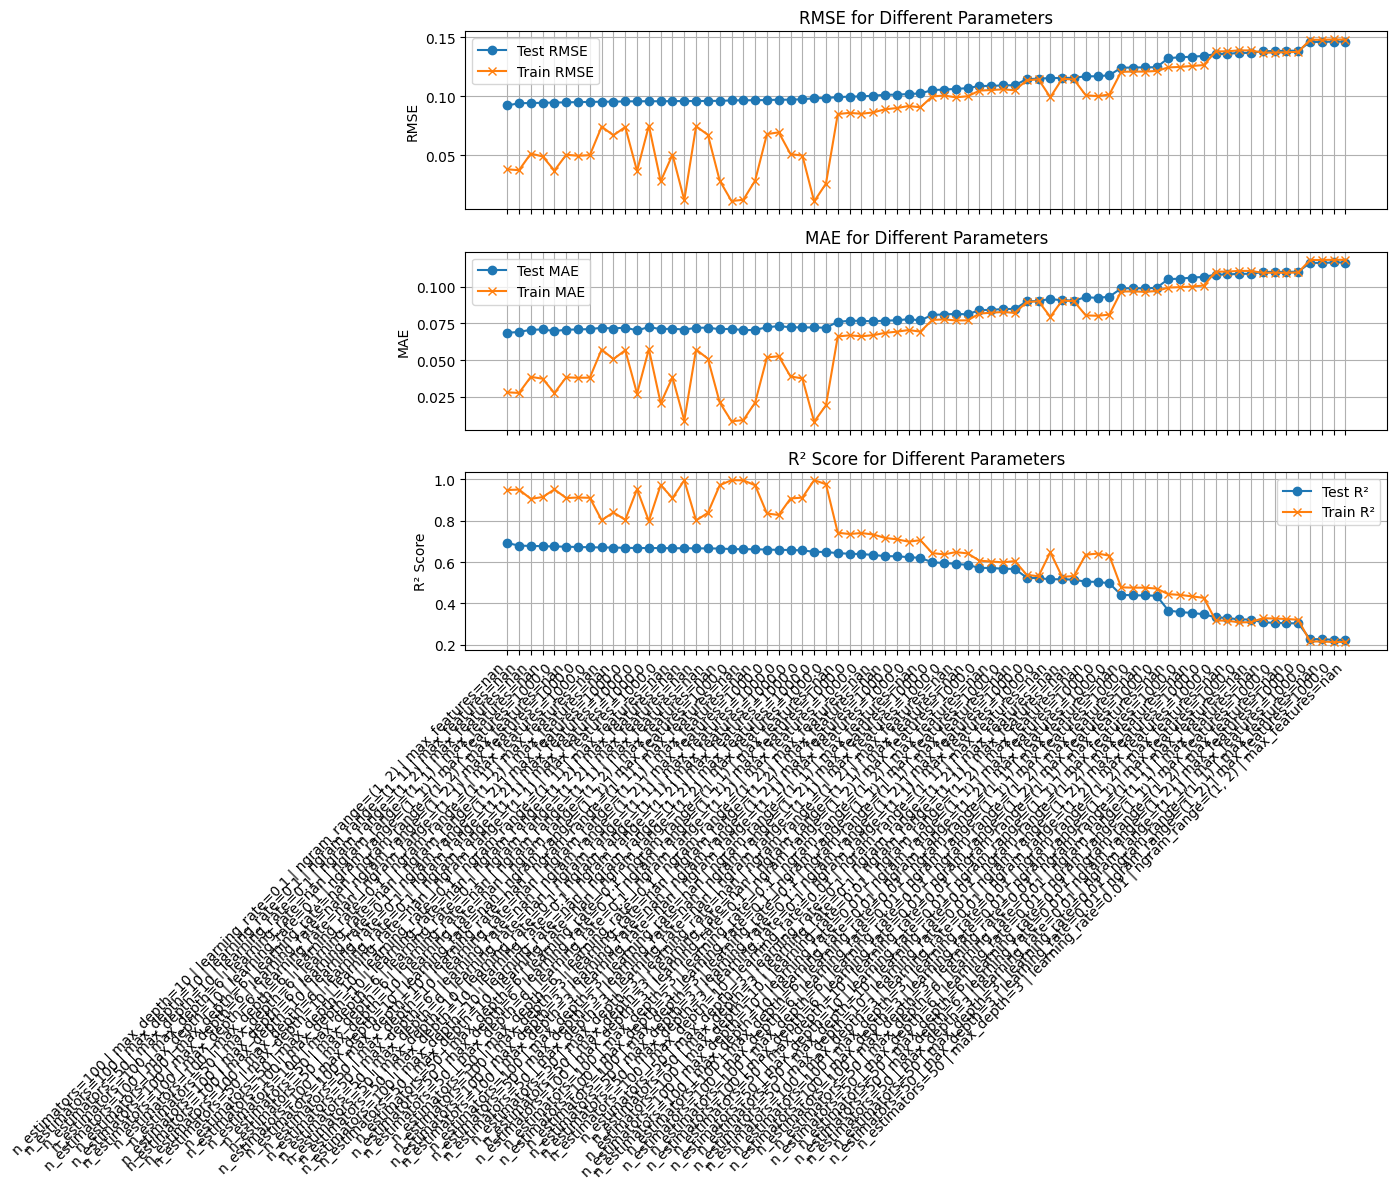

In [29]:
plot_results(xgb_results, ['n_estimators', 'max_depth', 'learning_rate', 'ngram_range',
       'max_features'])

In [30]:
xgb_results.to_csv("../results/xg_boost_results.csv", index=False)

We are ignoring XG Boost as well because of lack of performance and overfitting for most range of parameters.

## Gradient Boosting Regressor

In [6]:
# Gradient Boost with base
# Train with base XG Boost Regressor
gb_model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = load_default_model_data()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb= mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb, mae_gb, r2_gb

(0.10886572380865424, 0.08453362474284505, 0.5714180665964468)

In [ ]:
# Finetune gradient boosting regressor model along with TFIDF vectorization and other model parameters
gb_results = []
n_estimators = [50, 100]
max_depths = [3, 6, 10]
learning_rates = [0.01, 0.1]
n_gram_ranges = [(1, 1), (1, 2)]
max_features = [1000, None]
for n_estimators in n_estimators:
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            for ngram_range in n_gram_ranges:
                for max_feat in max_features:
                    tfidf = TfidfVectorizer(max_features=max_feat, ngram_range=ngram_range, stop_words='english')
                    preprocessor = ColumnTransformer(
                        transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
                    )
                    X_transformed = preprocessor.fit_transform(predictors)
                    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
                    model = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    mae = mean_absolute_error(y_test, y_pred)
                    r2 = r2_score(y_test, y_pred)
                    # Train data evaluation
                    y_pred_train = model.predict(X_train)
                    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                    mae_train = mean_absolute_error(y_train, y_pred_train)
                    r2_train = r2_score(y_train, y_pred_train)
                    
                    gb_results.append({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'ngram_range': ngram_range,
                        'max_features': max_feat,
                        'rmse': rmse,
                        'mae': mae,
                        'r2': r2,
                        'rmse_train': rmse_train,
                        'mae_train': mae_train,
                        'r2_train': r2_train
                    })

In [ ]:
gb_df = pd.DataFrame(gb_results).sort_values(by='rmse')
gb_df

In [ ]:
gb_df.to_csv("../results/gb_boosting_results.csv", index=False)

In [ ]:
gb_df.columns

In [ ]:
plot_results(gb_df, ['n_estimators', 'max_depth', 'learning_rate', 'ngram_range',
       'max_features'])

Gradient boosting is giving better results compared to Random forests. The model is not overfitting for range of parameters.

Considering the model performance, complexity and overfitting. These params are giving the best results:

n_estimators = 100

max_depth = 6

learning_rate = 0.1

n_grams = (1,2)

max_features = None

But, still considering the performance comparison with Ridge, ridge is performing better than this model.

# Final Model for Evaluation

We have selected "Ridge Regression" model for final evaluation since it is giving better results and has no overfitting.

Chosen Parameters:

ngram_range = (1,1)

max_features = 1000

alpha = 0.1

## Train Model

In [ ]:
# train the model with best parameters
#tfidf with best parameters
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 1), stop_words='english')
preprocessor = ColumnTransformer(
    transformers=[(col, Pipeline([('tfidf', tfidf)]), col) for col in predictors_features]
)
X_transformed = preprocessor.fit_transform(predictors)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42) 

In [ ]:
# Train model with best parameters
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
mae_final = mean_absolute_error(y_test, y_pred)
r2_final = r2_score(y_test, y_pred)
rmse_final, mae_final, r2_final

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [ ]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [ ]:
plt.hist(residuals, bins=10)

The residual plot is not randomly scattered. It shows some patterns:
1. For lower values, the residuals are nearly random with most values tending towards positive, it shows the model is tending to under predict the score.
2. For middle values, the residuals are randomly scattered around center.
3. For higher values, the residuals are negative, it means the model is over predicting the matching scores.

From the histogram, we can see the residuals are uniformly distributed around 0. It shows the model is working well for most values, it means it is learning the majority data well, but failing to predict for extreme values.

In [ ]:
# Save the model
import joblib
joblib.dump(model, '../models/ridge_regression.pkl')
# Save the preprocessor
joblib.dump(preprocessor, '../models/preprocessor.pkl')